# **Анализ статей в ScienceDirect по поисковому запросу aka "Падение Юпитера" (×﹏×)**
## **Парсер данных**
## Код ниже получает статьи из ScienceDirect по вашему запросу
#### Как работать с программой?
    Для получения списка статей в ячейке под кодом введите ключевые слова, исследований, которые Вас интересуют.
    
    Ключевые слова вводятся на английском и должны быть разделены запятой.
    
    Ячейку с кодом обязательно необходимо выполнить для успешного построения графиков!

    Когда поиск будет закончен, программа выведет 'The search is completed'

#### Примечание:
    Если поиск не завершается более 5 минут, со стороны API произошла ошибка. Перезапустите код.

In [50]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

def requester(query, off):
    """Returns 100 articles - query results by keywords.
        It is possible to indent from the beginning of the results list, sorted by relevance.

        Keyword arguments:\n",
        query -- string with a query with comma separated keywords
        off -- int, number of articles to skip from the beginning of the list
    """
    url = 'https://api.elsevier.com/content/search/sciencedirect'
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
         'x-els-apikey': '7f59af901d2d86f78a1fd60c1bf9426a'
    }

    data = {
        "qs": query,
        "display": {
            "offset": off,
            "show": 100,
            "sortBy": "relevance"
        }
    }
    response = requests.put(url, headers=headers, data=json.dumps(data))
    return response.json()

i = -1
counter = 0
list_results = []
authors_dict = {}
year_dict = {}
authors_years = {}

print('Please enter keywords separated by commas:')
search = input()

while i == -1:  ##Because the query often produces an error 'rate time exceeded', the loop 'while 'allows to call API until the desired result is obtained
    search_res = requester(search, counter)  ##find the total number of search results
    if 'resultsFound' in search_res:
        i = search_res['resultsFound']

if i == 0:  ##if there are no results
    print('No results found with this query')

while i > 0:  ##Because the query often produces an error 'rate time exceeded', the loop 'while 'allows to call API until the desired result is obtained
    search_res = requester(search, counter)
    if 'resultsFound' in search_res:
        list_results.extend(search_res['results'])  ##write every 100 search results to a list
        i = i - 100  ##the maximum number of articles that can be displayed in one request is 100
        counter += 100  ##the maximum offset is also 100
        search_res = {}
    if counter > 6000:  ##the maximum offset value is 6000, so the loop breaks when this value is reached
        break

for element in list_results:  ##prepare the necessary dictionaries for the graphs
    if 'publicationDate' in element:  ##with the number of publications per year
        index = element['publicationDate'].find('-')
        year = element['publicationDate'][:index]
        if year not in year_dict:
            year_dict[year] = 1
        elif year in year_dict:
            year_dict[year] += 1
        if 'authors' in element:  ##with the number of publications of one author 
            for author in element['authors']:
                person = author['name'].lower()
                if person not in authors_dict:
                    authors_dict[person] = 1
                    authors_years[person] = []  ##with the years of publications of one author
                    authors_years[person].append(year)
                elif person in authors_dict:
                    authors_dict[person] += 1
                    authors_years[person].append(year)

print('The search is completed')

Please enter keywords separated by commas:


 remote sensing, crop


The search is completed


## **Построитель графиков**
## Код ниже строит графики по результатам поиска публикаций
#### Какие графики получаются в результате?
    Программа выводит распределение количества публикаций по запросу по годам, года с наибольшим количеством публикаций по запросу и график распределения публикаций авторов, которые имеют наибольшее количество публикаций по годам

По вашему запросу найдено 6100 результатов
Список авторов с наибольшими количеством публикаций по заданным словам и количество их публикаций: 'jean-pierre wigneron': 21, 'laurence hubert-moy': 14, 'frédéric baret': 14, 'laurent barillé': 13, 'jean-philippe gastellu-etchegorry': 13, 'xiao xiang zhu': 12, 'serge andréfouët': 11, 'philippe ciais': 11, 'william p. kustas': 11, 'a. chehbouni': 10.
Года, в которые было опубликовано наибольшее количество работ по заданным словам: '2024': 728, '2023': 566, '2022': 537, '2021': 443, '2020': 318, '2019': 284, '2018': 267, '2016': 259, '2015': 222, '2017': 221.


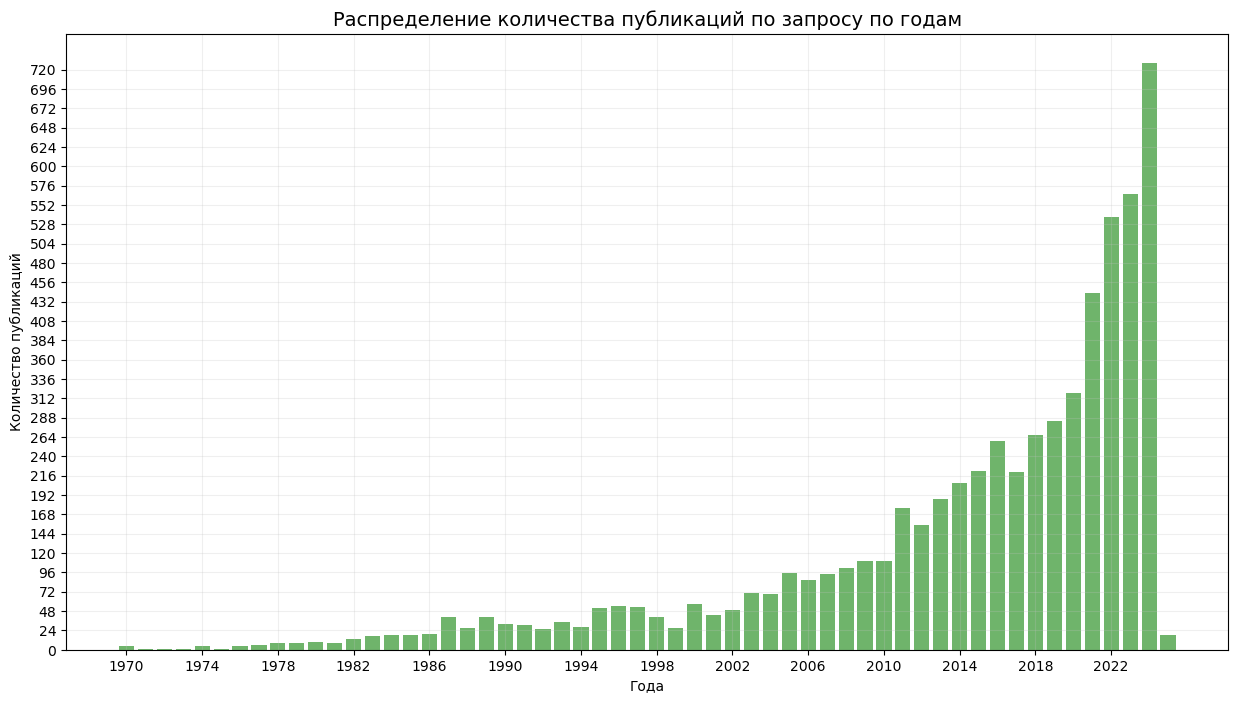

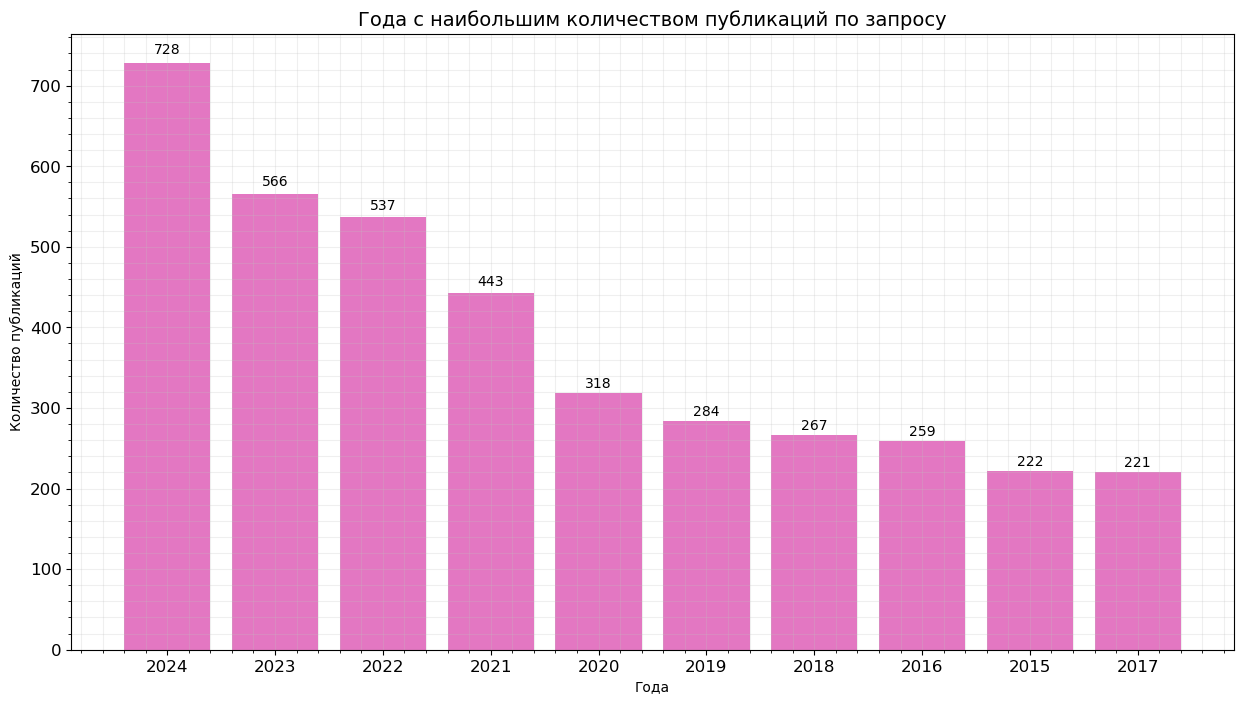

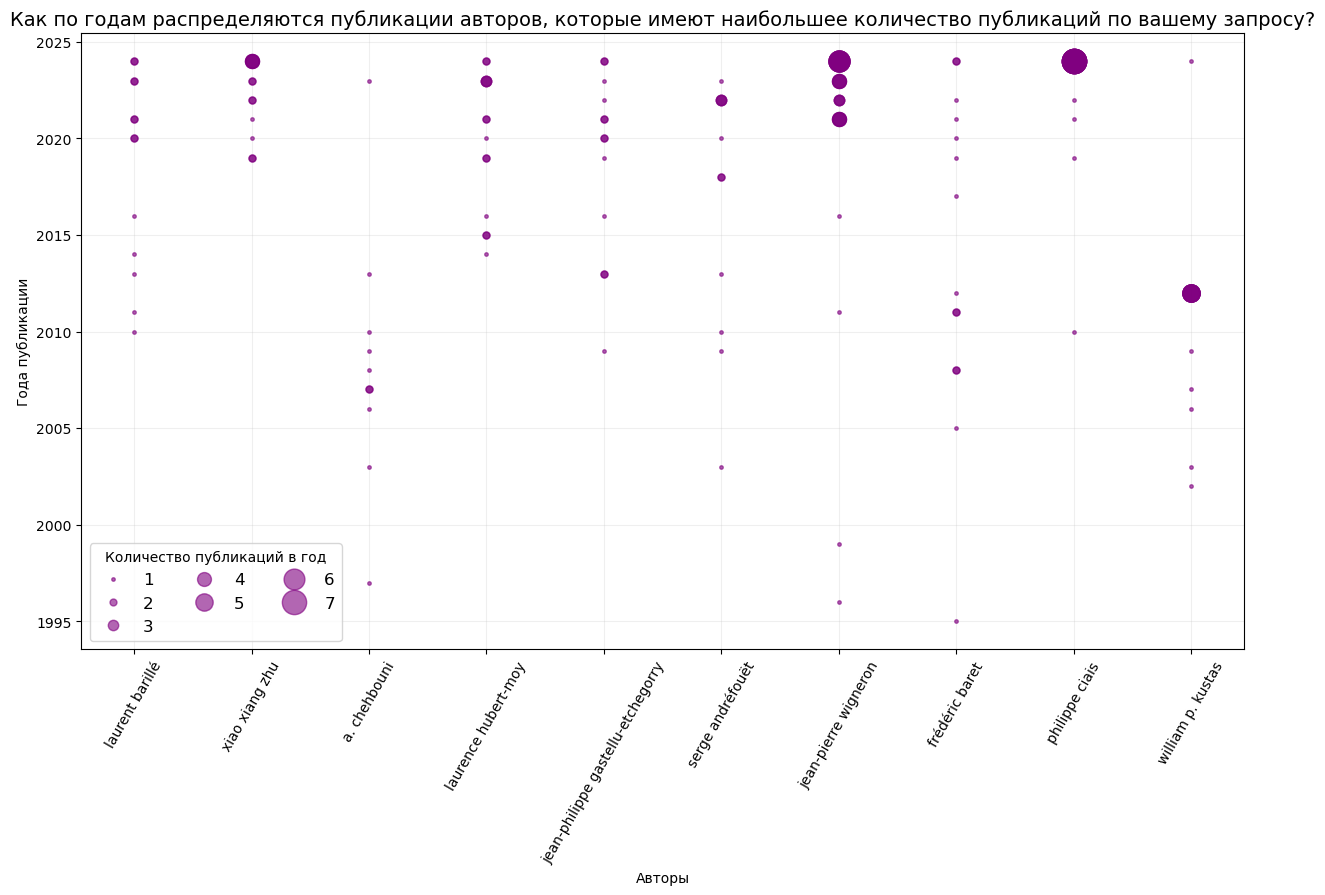

In [45]:
print(f'По вашему запросу найдено {len(list_results)} результатов')

sorted_authors = dict(sorted(authors_dict.items(), key=lambda item: item[1], reverse=True)[:10]) #Выводятся авторы с наибольшим количеством публикаций
print(f'Список авторов с наибольшими количеством публикаций по заданным словам и количество их публикаций: {str(sorted_authors)[1:-1]}.')

sorted_years = dict(sorted(year_dict.items(), key=lambda item: item[1], reverse=True)[:10]) #Выводятся года с наибольшим количеством публикаций
print(f'Года, в которые было опубликовано наибольшее количество работ по заданным словам: {str(sorted_years)[1:-1]}.')

sorted_years_0 = dict(sorted(year_dict.items()))
y_years_0 = sorted_years_0.keys()
x_count_0 = sorted_years_0.values()

plt.figure(figsize=(15,8))
plt.bar(y_years_0, x_count_0, color='#6fb46b')
plt.xlabel('Года', fontsize=10)
plt.xticks(range(0, len(y_years_0), 4)) 
plt.ylabel('Количество публикаций', fontsize=10)
if int(max(x_count_0)) > 30:
    plt.yticks(range(0, max(x_count_0), int(max(x_count_0)/30)))
plt.title('Распределение количества публикаций по запросу по годам', fontsize=14)
plt.grid(which='both', color='#c0c0c0', alpha = 0.25)

y_years = sorted_years.keys()
x_count = sorted_years.values()

plt.figure(figsize=(15,8))
plt.bar(y_years, x_count, color='C666')
plt.xlabel('Года', fontsize=10)
plt.ylabel('Количество публикаций', fontsize=10)
plt.title('Года с наибольшим количеством публикаций по запросу', fontsize=14)
ax=plt.gca()
ax.tick_params(labelsize=12) 
plt.minorticks_on()
plt.grid(which='both', color='#c0c0c0', alpha = 0.25)

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            label = labels[i]
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
    return(label)

autolabel(ax.patches, height_factor=1.01)

sizes = []
plt.figure(figsize=(15,8))
for authors_scatter, years_scatter in authors_years.items():
    if authors_scatter in sorted_authors.keys():
        for element in years_scatter:
            m_size = years_scatter.count(element)
            plt.plot(authors_scatter, int(element), ".", c='purple', alpha=0.6, markersize=m_size*5, label=m_size if m_size not in sizes else '')
            sizes.append(m_size)
            plt.xlabel('Авторы', fontsize=10)
            plt.xticks(rotation=60)
            plt.gca().invert_xaxis()
            plt.ylabel('Года публикации', fontsize=10)
            plt.title('Как по годам распределяются публикации авторов, которые имеют наибольшее количество публикаций по вашему запросу?', fontsize=14)
            plt.grid(which='both', color='#c0c0c0', alpha = 0.25)
            handles, labels = plt.gca().get_legend_handles_labels()
            handles, labels = zip(*[ (handles[i], labels[i]) for i in sorted(range(len(handles)), key=lambda k: list(map(int,labels))[k])] )
            plt.legend(handles, labels, fontsize=12, loc='lower left', ncols=3, title='Количество публикаций в год')